# Dashboard to Tune Hyperparameters of ML Model

## <strong style="color:tomato;">Table Of Contents</strong>

1. **Load Data**
2. **Vectorize Data**
2. **Train Model**
3. **Make Predictions**
4. **Evaluate ML Metrics**
5. **Save Model (Model Persistence)**

## <strong style="color:tomato;">Python Dependencies</strong>

* **streamlit** - For dashboard creation.
* **scikit-learn** - For datasets & ML Model.
* **pandas** - For representing dataset as dataframe.
* **joblib** - For model persistence (saving & loading).
* **scikit-plot** - For visualizing ML Metrics.

In [48]:
import sklearn

print("Scikit-Learn : {}".format(sklearn.__version__))

import scikitplot as skplt

print("Scikit-Plot Version : {}".format(skplt.__version__))

import joblib

print("Joblib Version : {}".format(joblib.__version__))

import matplotlib.pyplot as plt

Scikit-Learn : 1.2.1
Scikit-Plot Version : 0.3.7
Joblib Version : 1.2.0


## 1. Load Data

In [11]:
from sklearn import datasets

news_groups = datasets.fetch_20newsgroups()

news_groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
news_groups = datasets.fetch_20newsgroups(categories=['alt.atheism', 'comp.graphics', 'rec.autos',
                                                      'sci.electronics', 'talk.politics.guns',])

news_groups.target_names

['alt.atheism',
 'comp.graphics',
 'rec.autos',
 'sci.electronics',
 'talk.politics.guns']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(news_groups.data, news_groups.target, train_size=0.8,
                                                    random_state=123)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(2236, 559, 2236, 559)

## 2. Vectorize Data

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50_000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

((2236, 38096), (559, 38096))

## 3. Train Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_classif = RandomForestClassifier()

rf_classif.fit(X_train_vec, Y_train)

RandomForestClassifier()

## 4. Make Predictions

In [30]:
Y_test_preds = rf_classif.predict(X_test_vec)

Y_test_preds[:5]

array([2, 4, 3, 0, 4])

In [33]:
Y_train_preds = rf_classif.predict(X_train_vec)

Y_train_preds[:5]

array([0, 1, 4, 3, 0])

## 5. Evaluate ML Metrics

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Test  Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))
print("Train Accuracy : {:.2f}".format(accuracy_score(Y_train, Y_train_preds)))

print("\nConfusion Matrix :")
print(confusion_matrix(Y_test, Y_test_preds))

print("\nClassification Report :")
print(classification_report(Y_test, Y_test_preds, target_names=news_groups.target_names))

Test  Accuracy : 0.93
Train Accuracy : 1.00

Confusion Matrix :
[[ 89   1   0   2   0]
 [  1 119   1   0   1]
 [  0   5 114   3   2]
 [  0  13   3  97   0]
 [  1   2   2   3 100]]

Classification Report :
                    precision    recall  f1-score   support

       alt.atheism       0.98      0.97      0.97        92
     comp.graphics       0.85      0.98      0.91       122
         rec.autos       0.95      0.92      0.93       124
   sci.electronics       0.92      0.86      0.89       113
talk.politics.guns       0.97      0.93      0.95       108

          accuracy                           0.93       559
         macro avg       0.93      0.93      0.93       559
      weighted avg       0.93      0.93      0.93       559



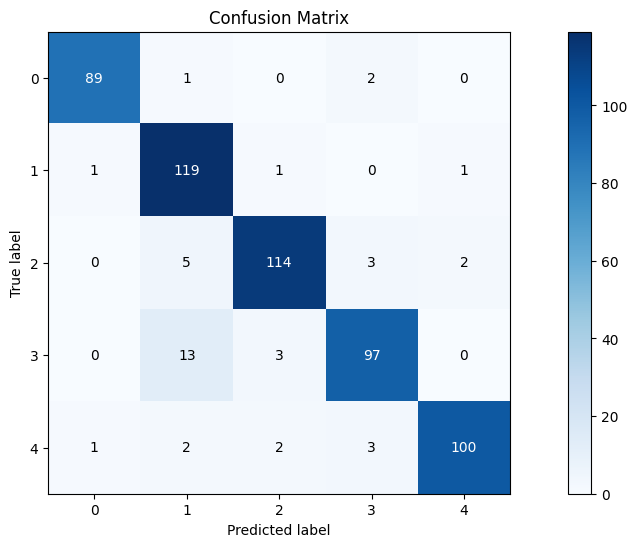

In [70]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_confusion_matrix(Y_test, Y_test_preds, ax=ax1);

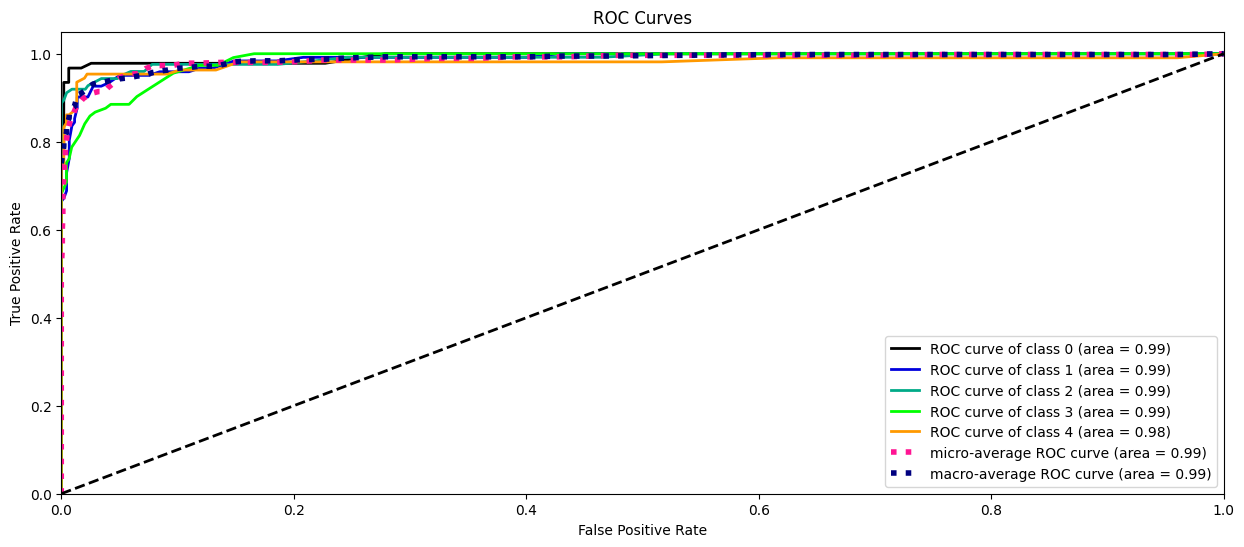

In [53]:
Y_test_probs = rf_classif.predict_proba(X_test_vec)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_roc(Y_test, Y_test_probs, ax=ax1);

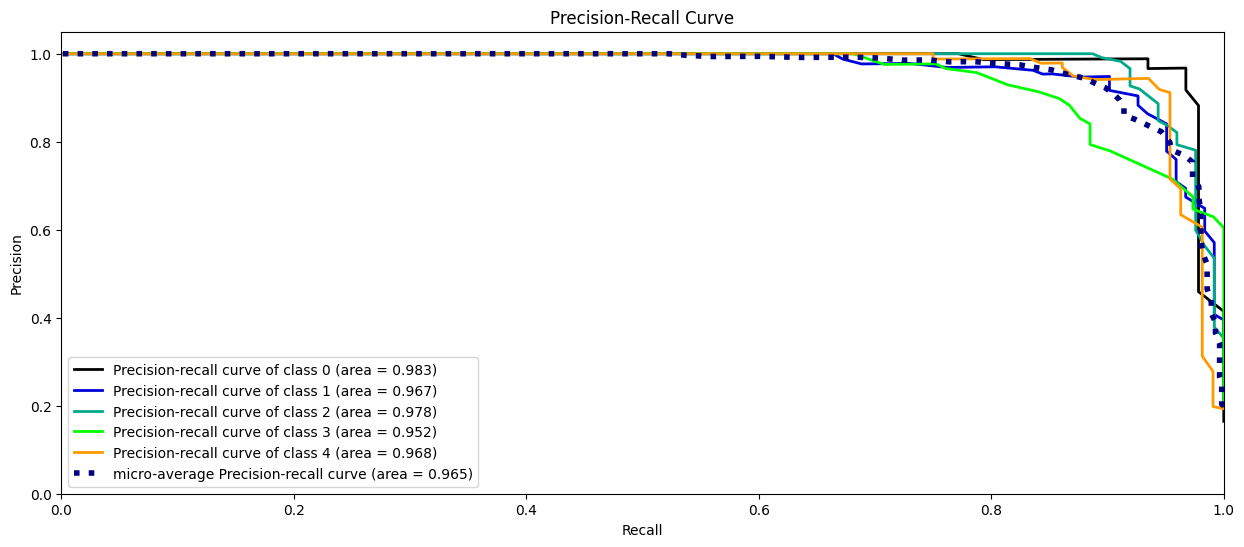

In [54]:
Y_test_probs = rf_classif.predict_proba(X_test_vec)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_precision_recall(Y_test, Y_test_probs, ax=ax1);

## 6. Model Persistence

In [35]:
from joblib import dump, load

dump(rf_classif, "rf_classif.model")

['rf_classif.model']

In [36]:
rf_classif_2 = load("rf_classif.model")

rf_classif_2

RandomForestClassifier()

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Y_train_preds = rf_classif_2.predict(X_train_vec)
Y_test_preds = rf_classif_2.predict(X_test_vec)

print("Test  Accuracy : {:.2f}".format(accuracy_score(Y_test, Y_test_preds)))
print("Train Accuracy : {:.2f}".format(accuracy_score(Y_train, Y_train_preds)))

print("\nConfusion Matrix :")
print(confusion_matrix(Y_test, Y_test_preds))

print("\nClassification Report :")
print(classification_report(Y_test, Y_test_preds))

Test  Accuracy : 0.93
Train Accuracy : 1.00

Confusion Matrix :
[[ 89   1   0   2   0]
 [  1 119   1   0   1]
 [  0   5 114   3   2]
 [  0  13   3  97   0]
 [  1   2   2   3 100]]

Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        92
           1       0.85      0.98      0.91       122
           2       0.95      0.92      0.93       124
           3       0.92      0.86      0.89       113
           4       0.97      0.93      0.95       108

    accuracy                           0.93       559
   macro avg       0.93      0.93      0.93       559
weighted avg       0.93      0.93      0.93       559



## References

* [**Scikit-Plot**](https://coderzcolumn.com/tutorials/machine-learning/scikit-plot-visualizing-machine-learning-algorithm-results-and-performance)
* **[Random Forest](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-bagging-and-random-forests)**
* **[Scikit-Learn - Model Evaluation & Scoring Metrics](https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn)**